In [1]:
%matplotlib inline
%pylab inline
%config InlineBackend.figure_format = 'svg'
import mru.iomanager as io
import mru.computevalue as cv
import mru.notebook_utils as nu
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

Populating the interactive namespace from numpy and matplotlib


In [2]:
def plotplaceimprove(result, nres, node_val, graph, pos_nodes=None, incremental=True, onlybest=False):
    if onlybest:
        gamevals = result[0][nres]
        plac = result[1][nres]
        sortimpro = 0
    gamevals, plac, _ = zip(*result[5][nres])
    sortimpro = np.argsort(gamevals)
    if not incremental and onlybest:
        raise ValueError
    if not incremental:
        sortimpro = range(len(gamevals))
    if onlybest:
        sortimpro = [sortimpro[-1]]
        
    old = []
    for imp in sortimpro:
        if imp > 0 and gamevals[imp] <= gamevals[imp - 1]:
            pass
        col = ['y'] * len(node_val)
        for tp in plac[imp]:
            col[tp[1]] = 'g'
        if pos_nodes is None:
            pos_nodes = nx.spring_layout(graph)
        plt.figure(imp)
        plt.title("game values = " + str(gamevals[imp]))
        nx.draw_networkx(graph,
                         node_color=col,
                         # node_size=1000,
                         # font_size=20,
                         pos=pos_nodes,
                         with_labels=True)
        node_vals_dict = {i: "{:.2f}".format(v) for i, v in enumerate(node_val)}
        pos_attrs = {}
        for node, coords in pos_nodes.items():
            pos_attrs[node] = (coords[0], coords[1] + 0.04)
        nx.draw_networkx_labels(graph,
                                pos_attrs,
                                # font_size=20,
                                labels=node_vals_dict)
        plt.show()

# Placements

In [3]:
result = {}
graphs = {}

In [3]:
x = range(10)
y = [1, 7, 8, 9, 10, 11, 30, 4]
for i in x:
    graphs[i] = io.load_graph(25, 5, 8, i)
    for j in y:
        result[(i, j)] = io.load_results(25, 5, 8, i, enumtype=j)
if False:
    print('game values')
    for i in x:
        print('********************************')
        print('Values of game ' + str(i))
        for j in y:
            print('-----')
            print('enumeration ' + str(j))
            print(result[(i, j)][0])

IOError: results8/res_graphs_25_ntgts/res_instance_ntgts_25_den_08_dead_5_graphix_0_ix_0

In [7]:
for i in [2]:
    for e in [4]:
        pstring ='Diffvalues of game ' + str(i) + ' with enum ' + str(e) + ' {'
        for k, v in result[(i, 10)][0].iteritems():
            p = result[(i, e)][0][k] - v
            pstring += str(k) + ': ' + str(p) + ', '
        pstring = pstring.rsplit(', ', 1)[0] + '}'
        print(pstring)

Diffvalues of game 2 with enum4 {2: 0.0, 3: -0.0264645962548, 4: -0.030961157982, 5: -0.0119213803986, 6: 0}


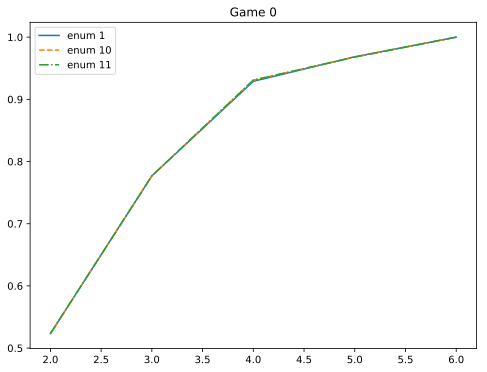

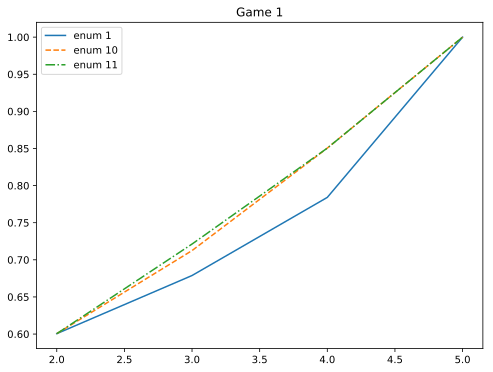

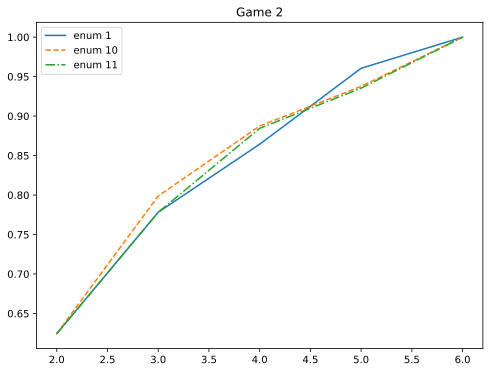

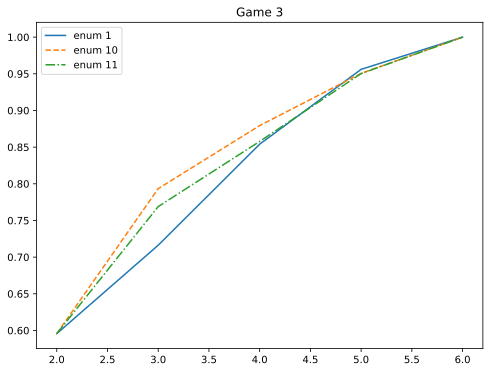

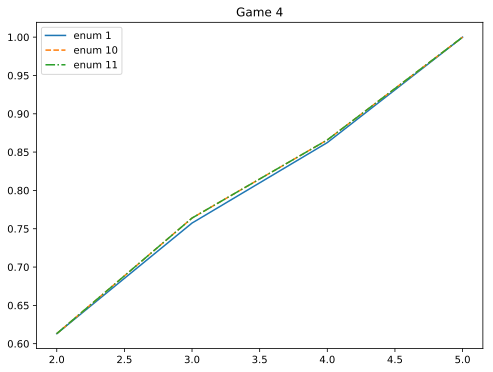

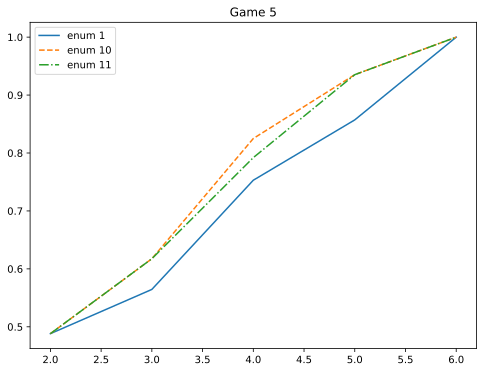

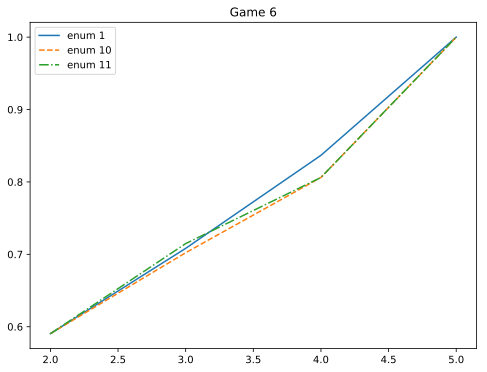

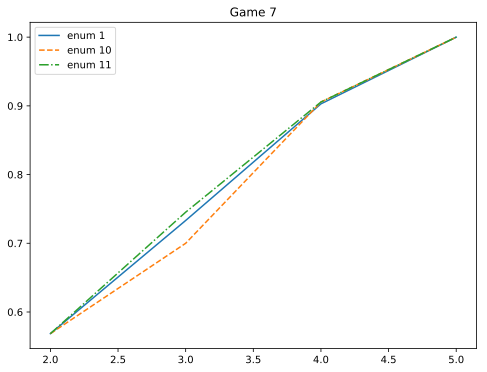

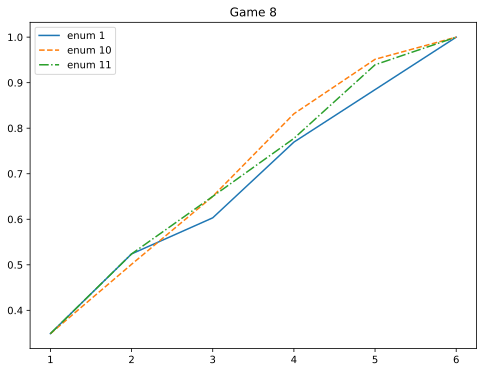

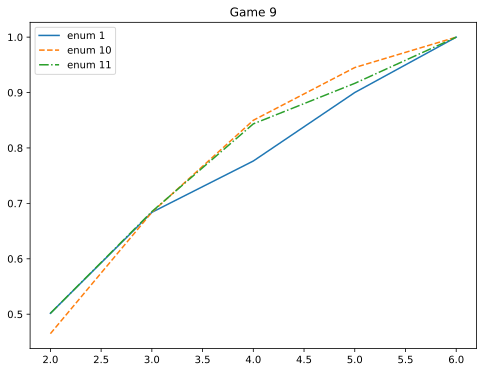

In [40]:
for i in x:
    plt.figure(i)
    linestyle = iter(["-", "--", "-.", ":"])
    labels = []
    for e in [30, 10, 11]:
        val = sorted(result[(i, e)][0].items())
        x, y = zip(*val)
        plt.plot(x, y, next(linestyle))
        if e == 30:
            e = 1
        labels.append('enum ' + str(e))
    plt.title('Game ' + str(i))
    plt.legend(labels, loc='upper left')

NameError: name 'G' is not defined

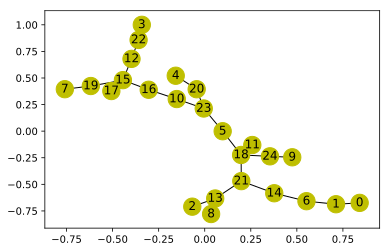

In [4]:
G[0], layout[0] = nu.compute_nx_graph(graphs[0], plot=True)

In [9]:
G = {}
layout = {}
values = {}
for i in x:
    G[i], layout[i] = nu.compute_nx_graph(graphs[i])
    values[i] = [v.value for v in graphs[i].getVertices()]

## Values Game 7

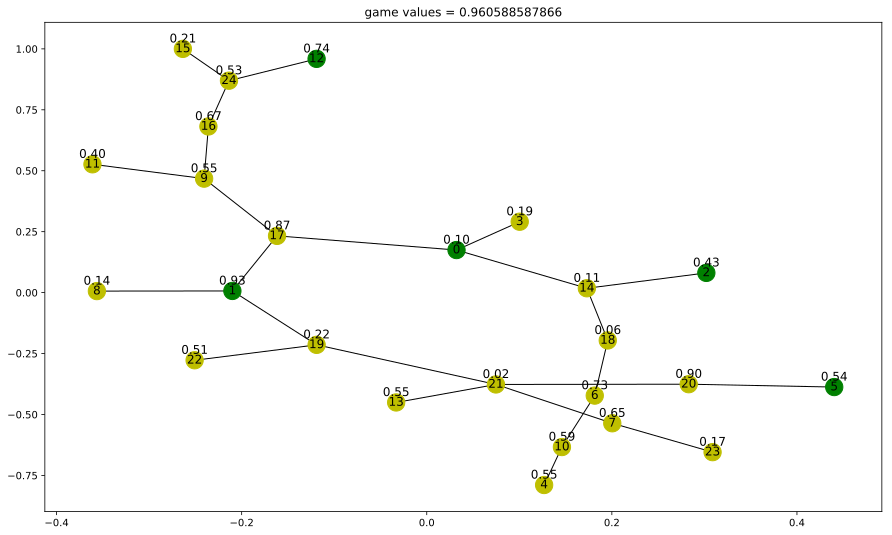

In [41]:
pylab.rcParams['figure.figsize'] = (15, 9)
game = 0
enum = 1
numres = 5
plotplaceimprove(result[(game, enum)], numres, values[game], G[game], layout[game], onlybest=True)
pylab.rcParams['figure.figsize'] = (8.0, 6.0)

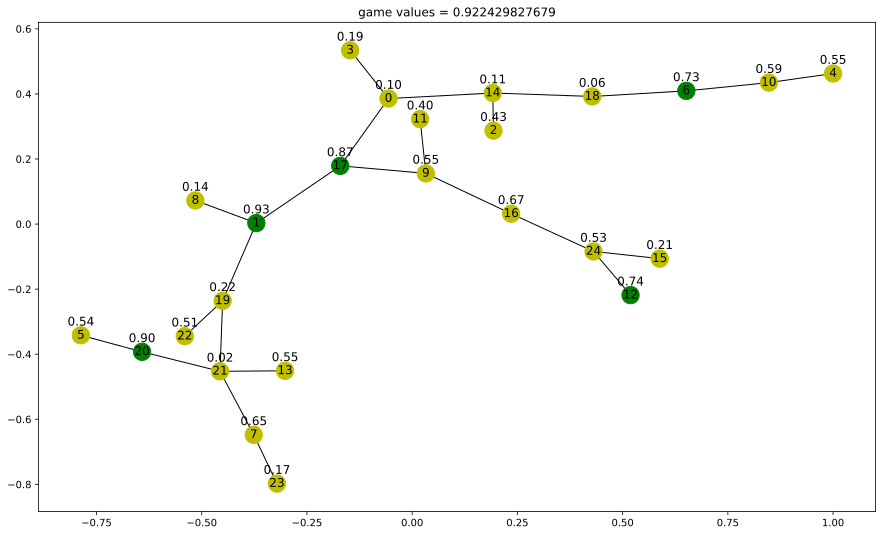

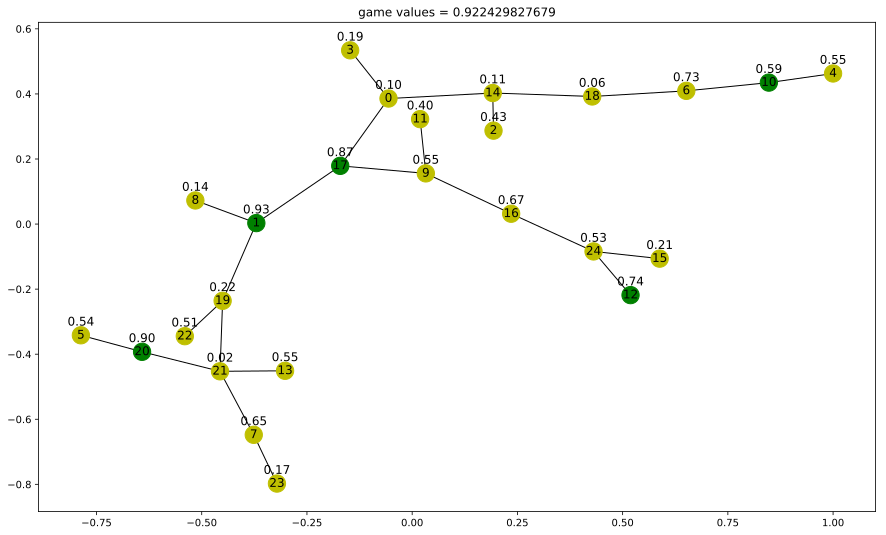

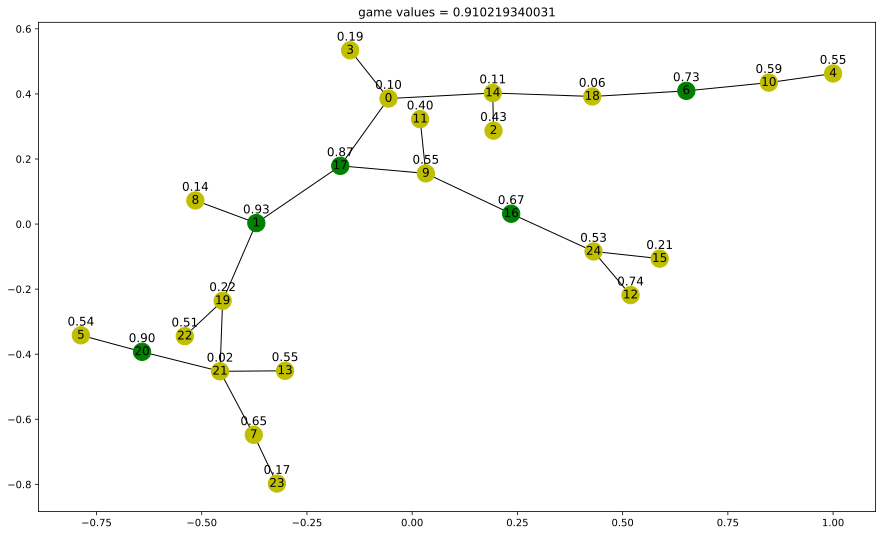

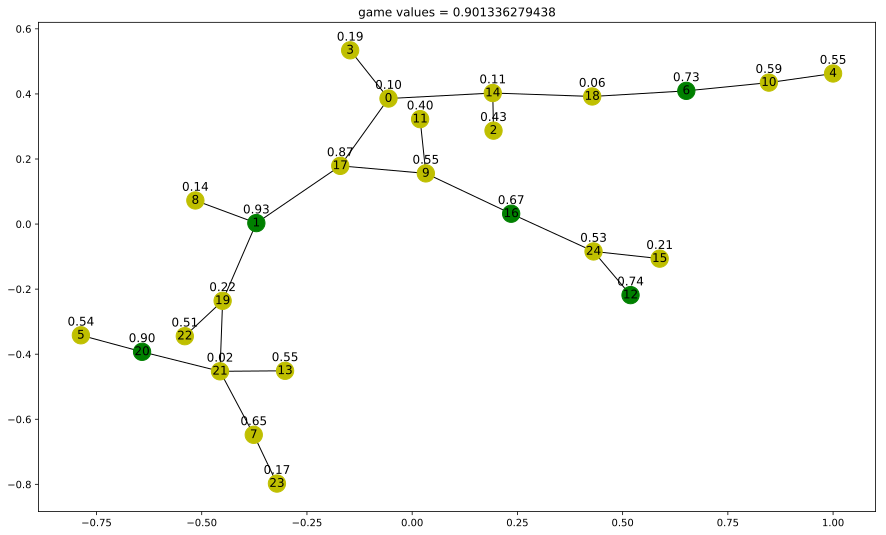

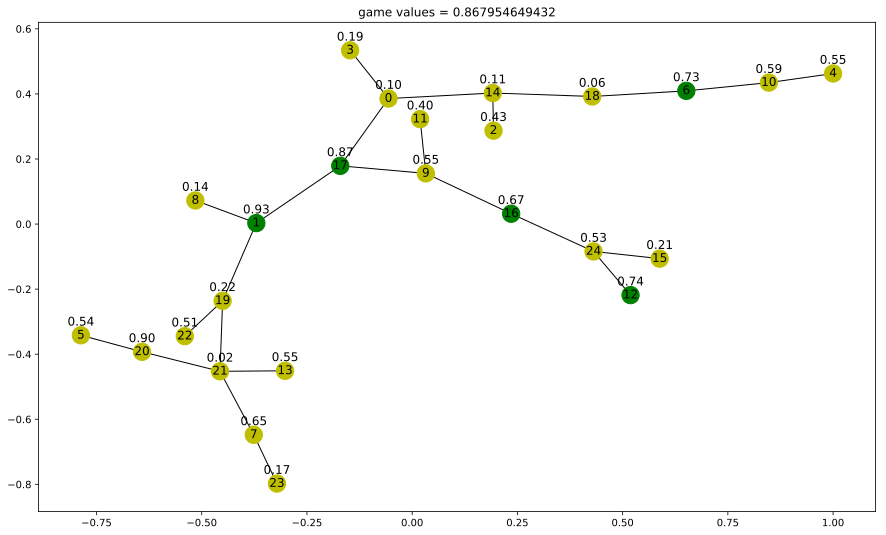

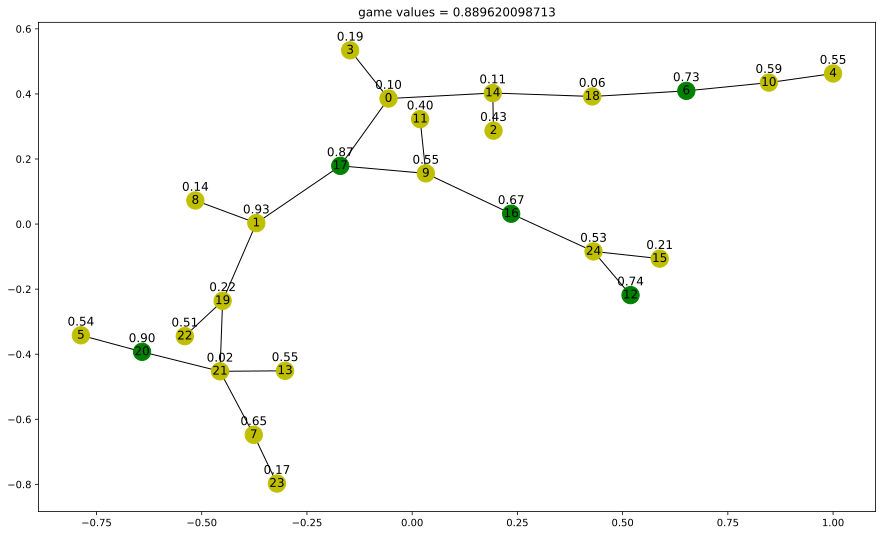

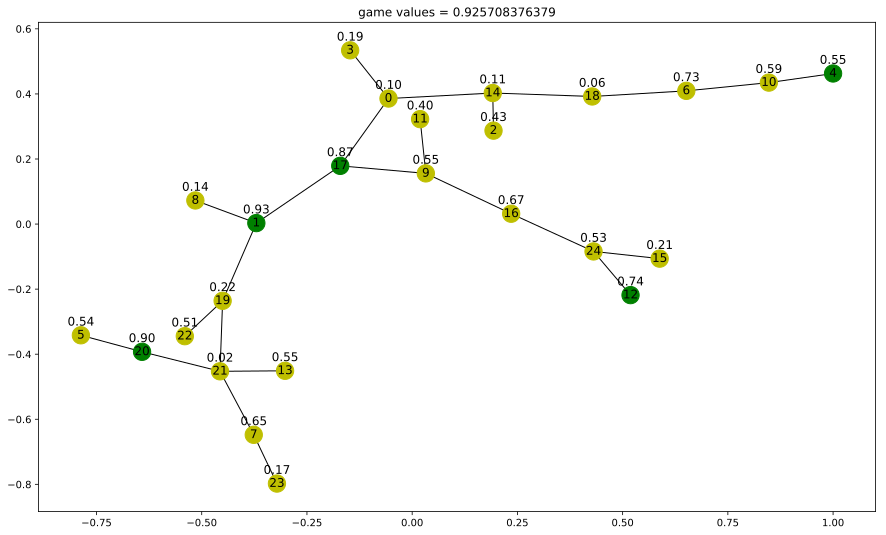

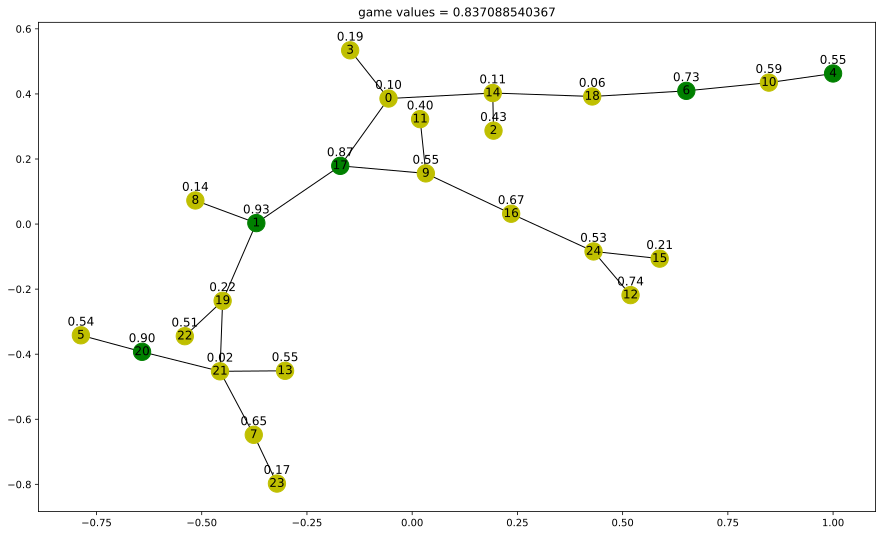

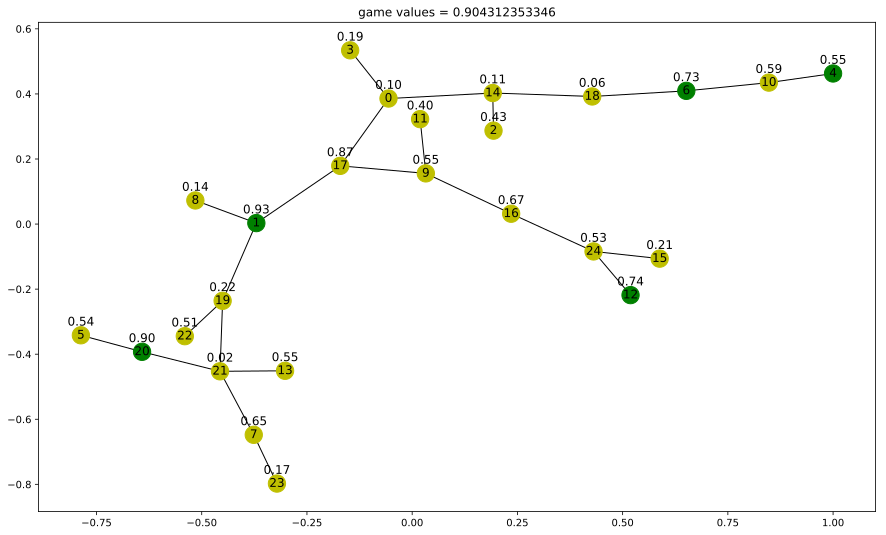

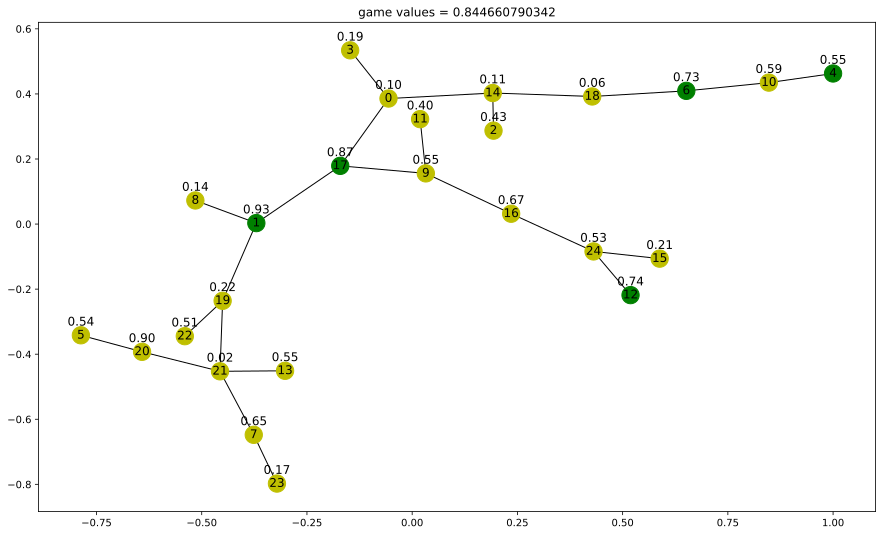

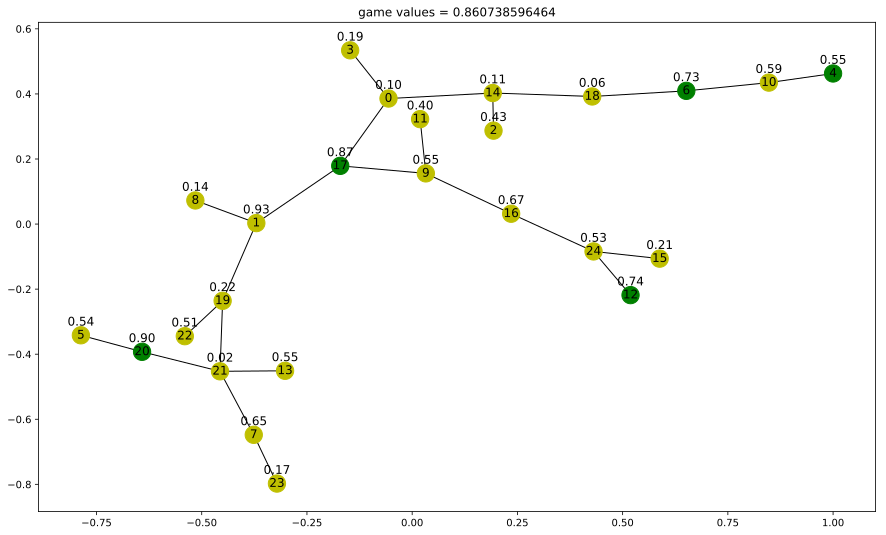

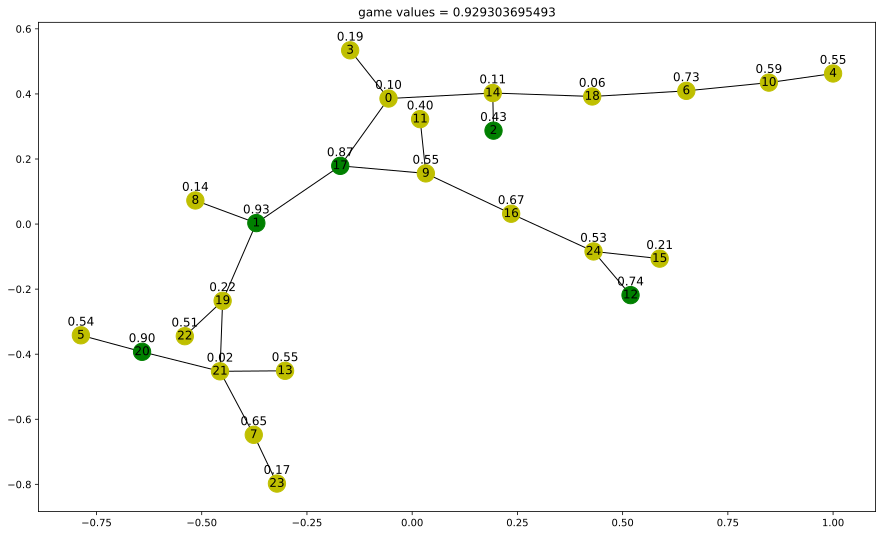

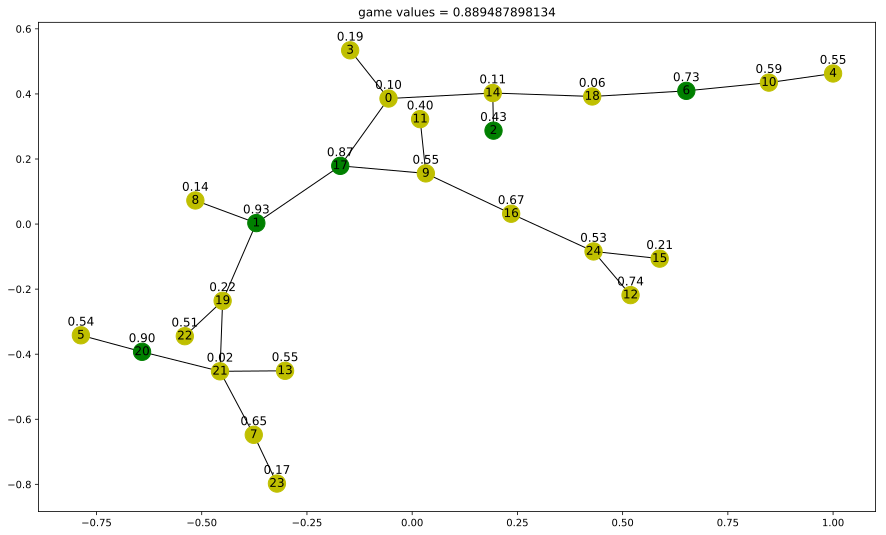

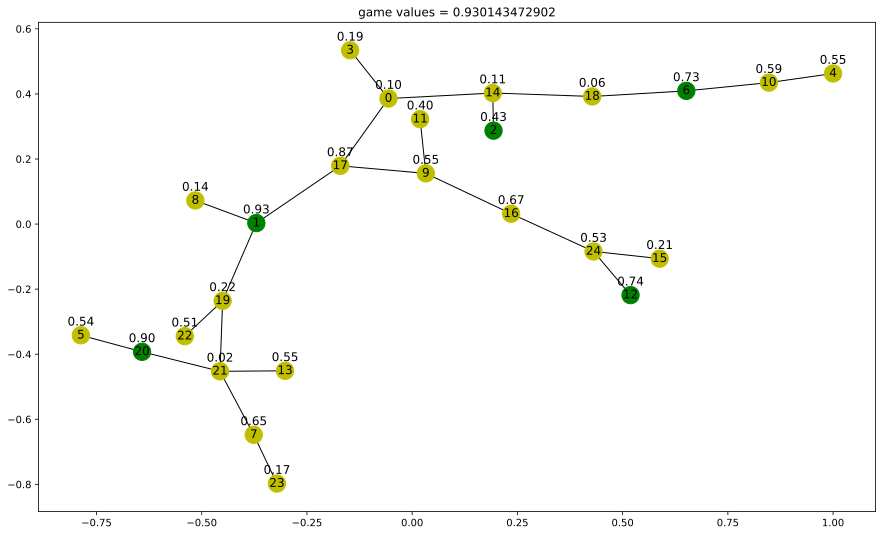

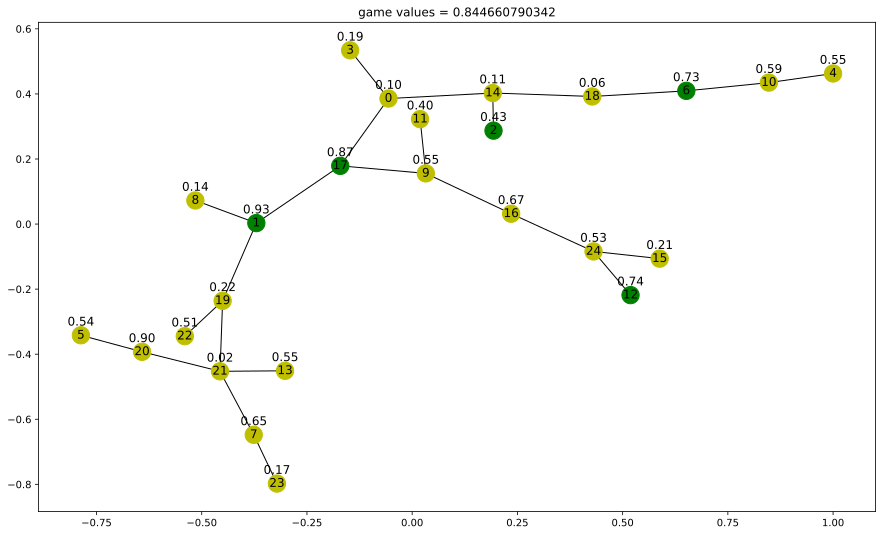

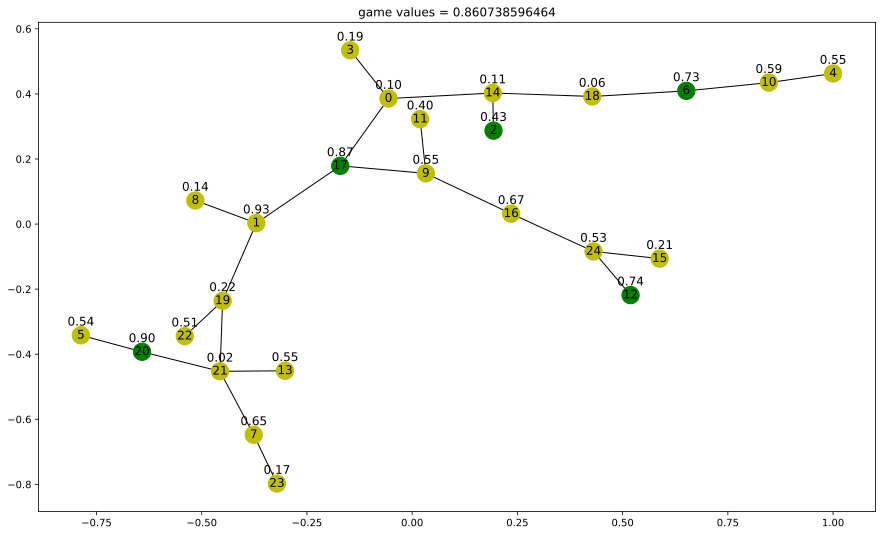

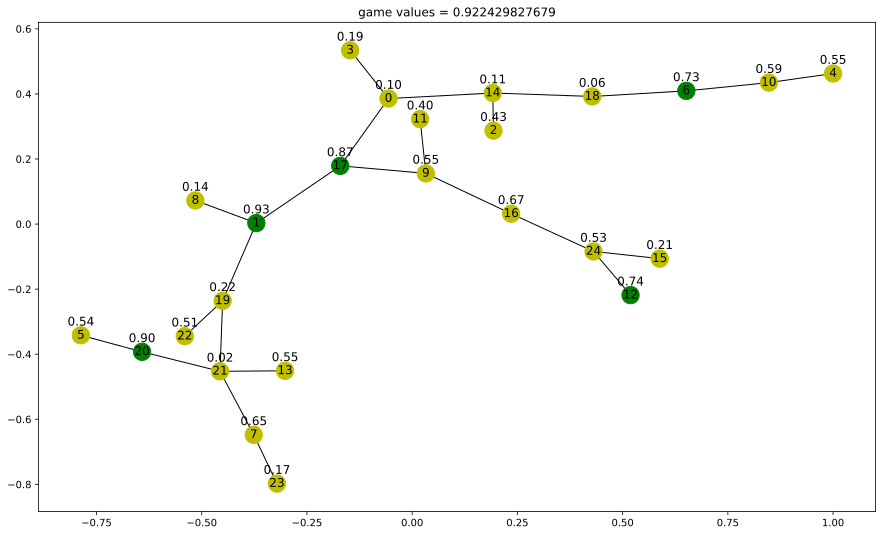

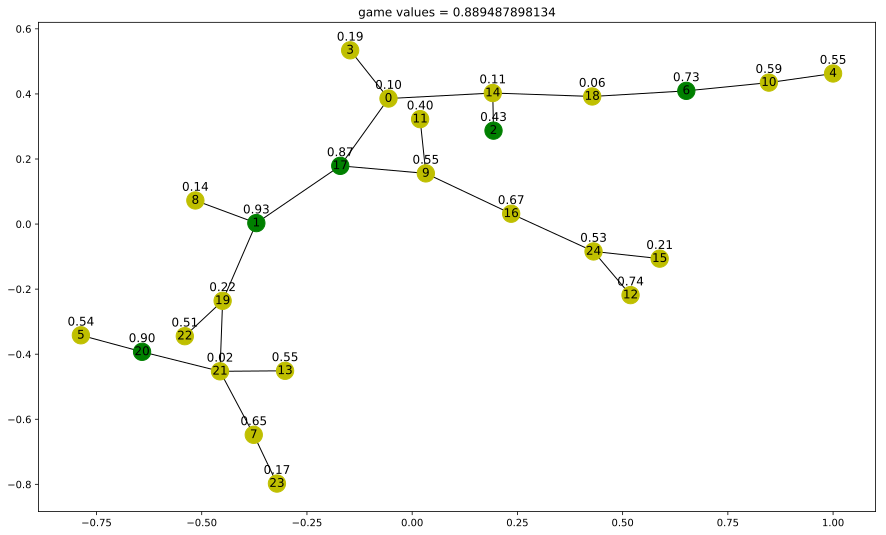

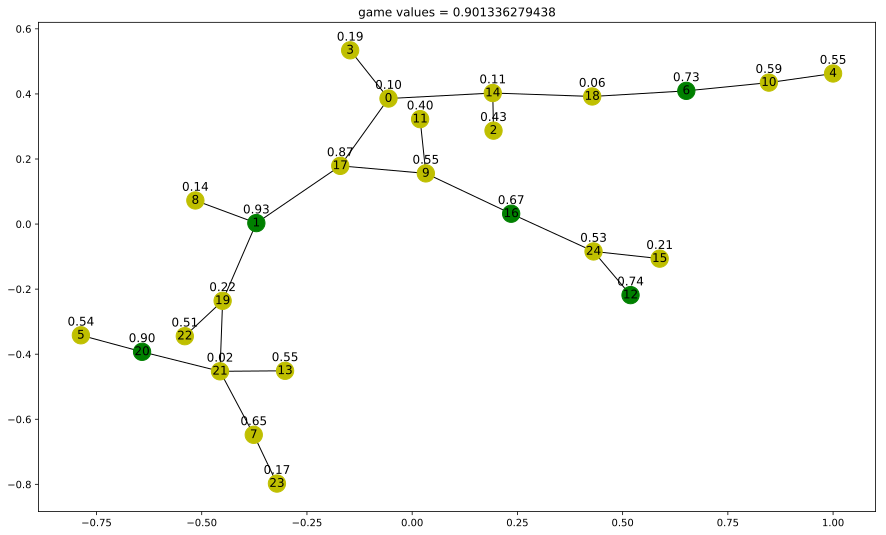

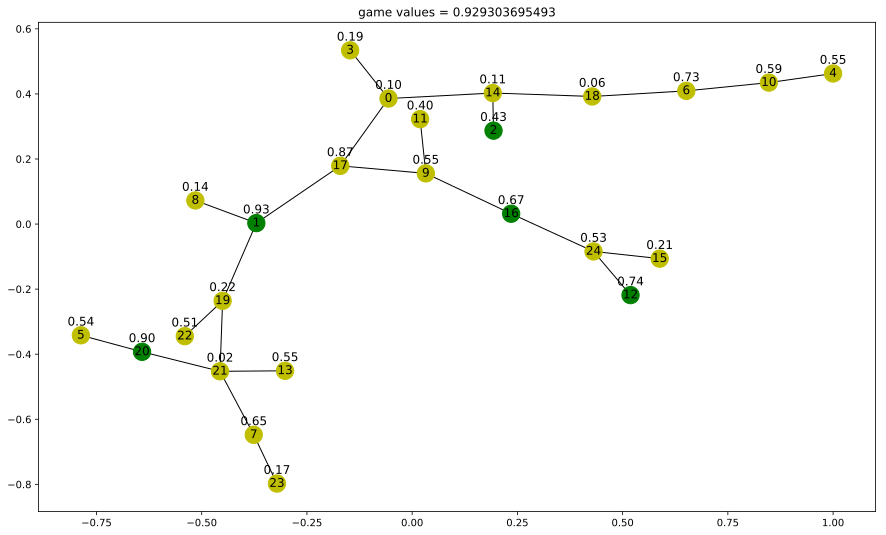

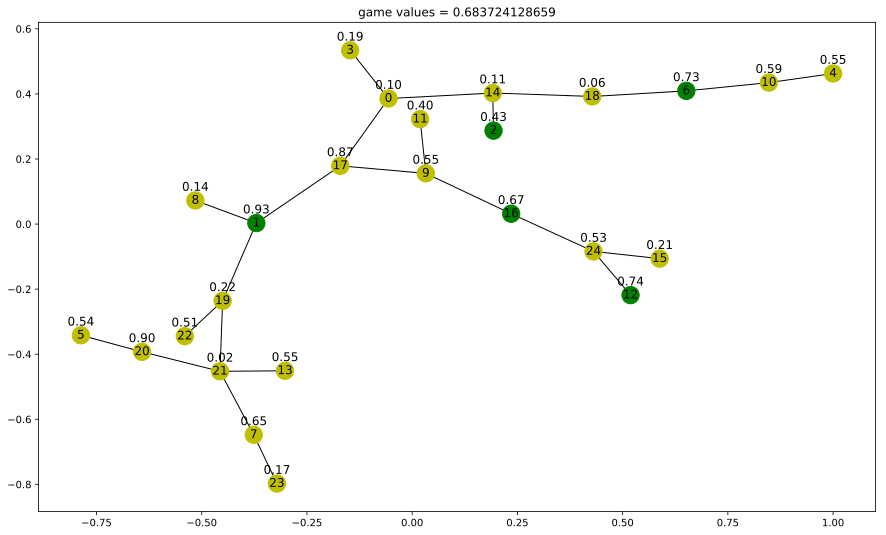

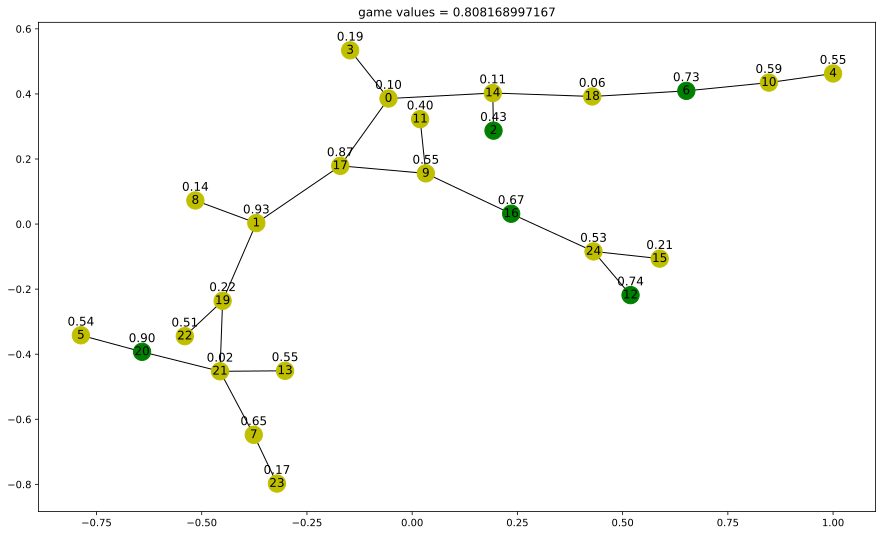

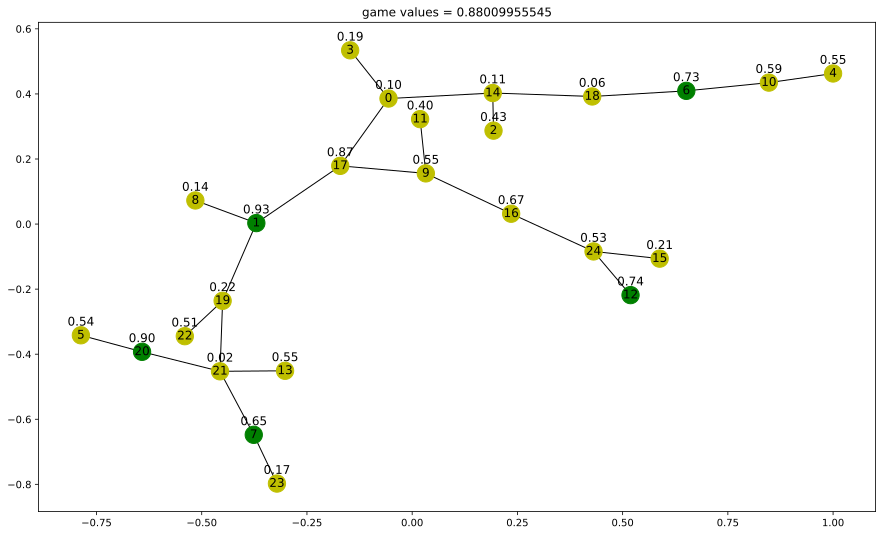

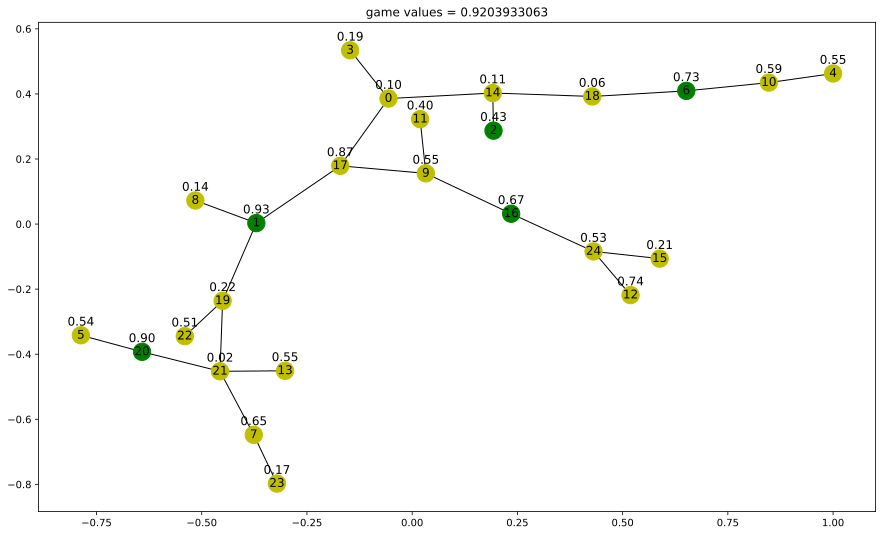

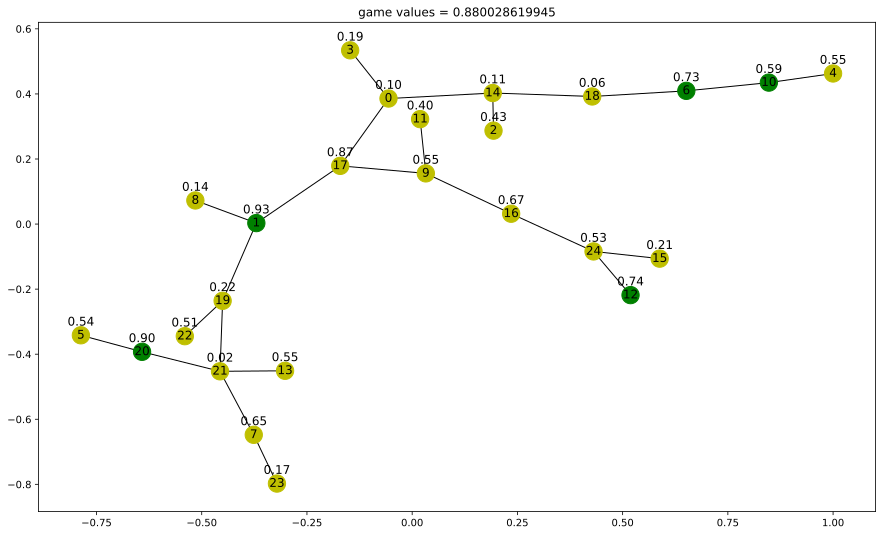

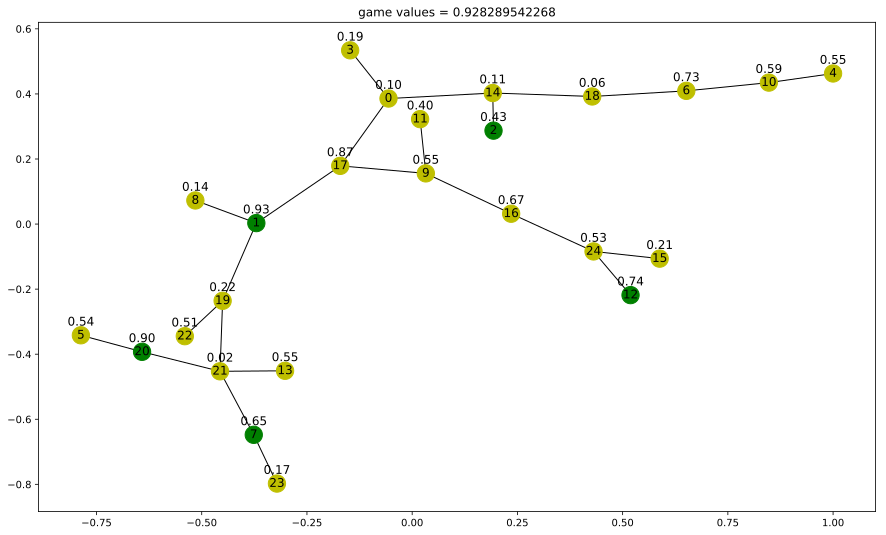

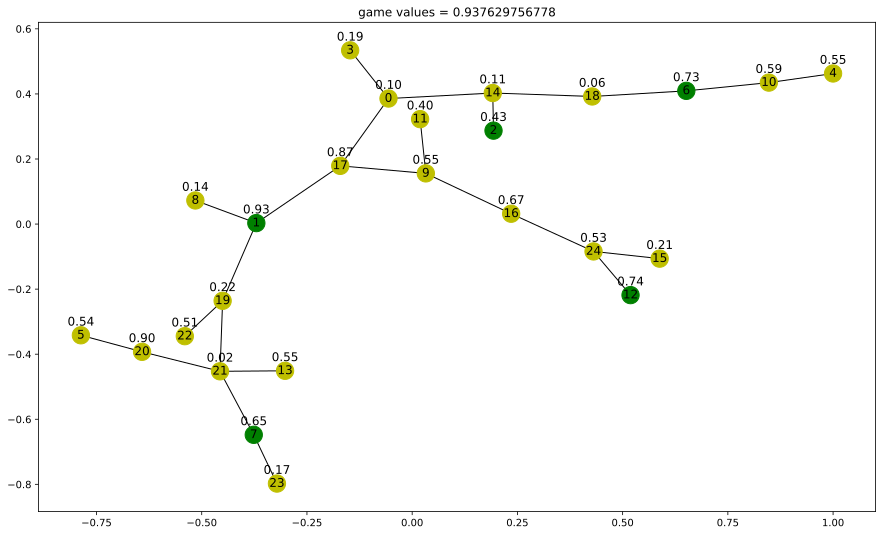

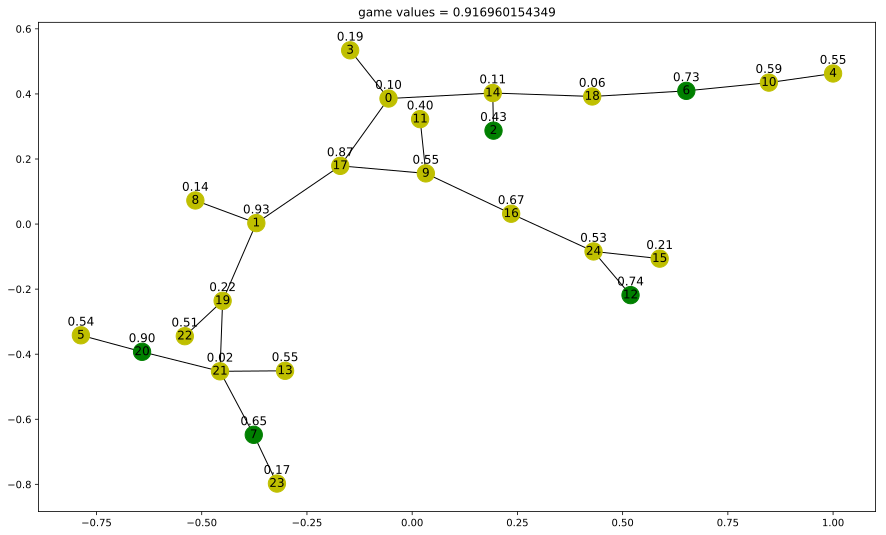

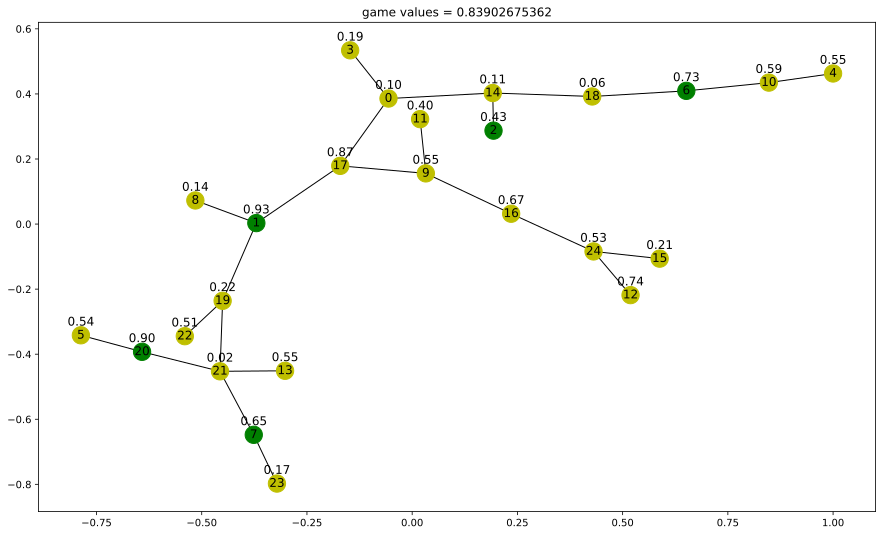

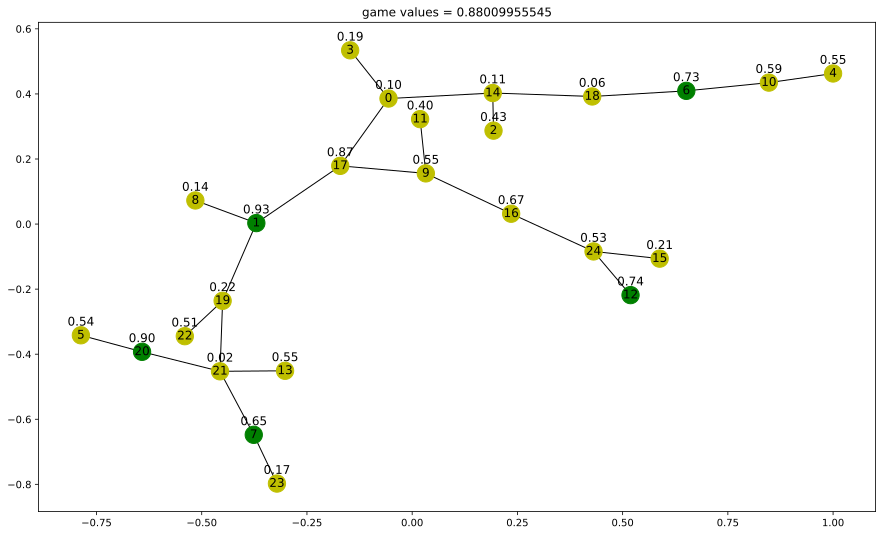

In [11]:
pylab.rcParams['figure.figsize'] = (15, 9)
game = 2
enum = 10
numres = 5
plotplaceimprove(result[(game, enum)], numres, values[game], G[game], layout[game], incremental=False)
pylab.rcParams['figure.figsize'] = (8.0, 6.0)

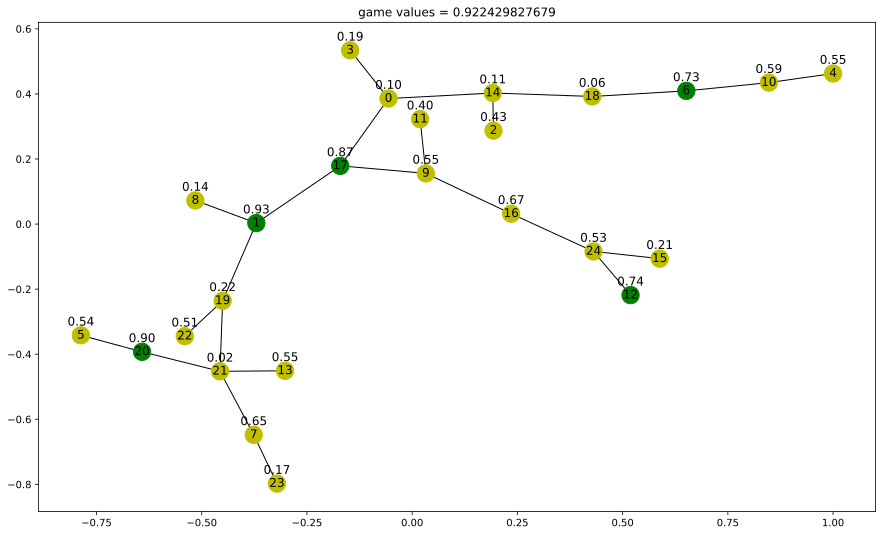

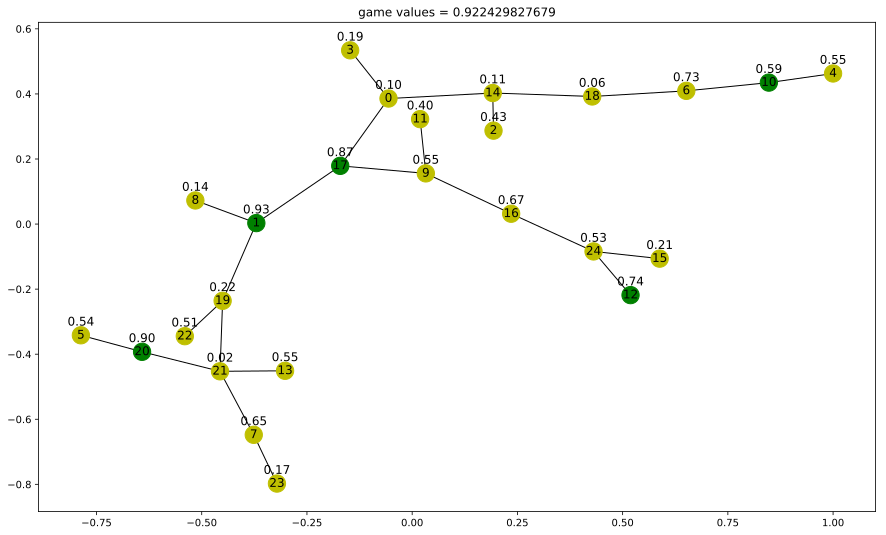

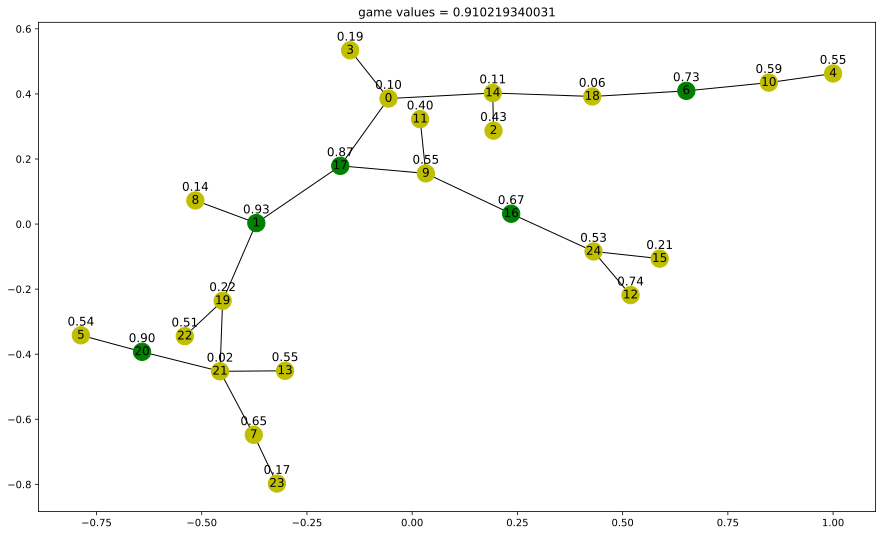

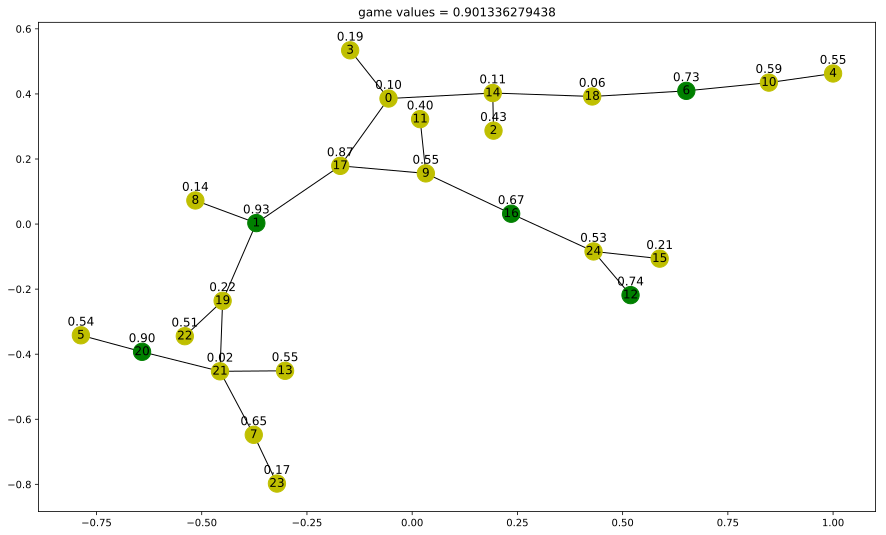

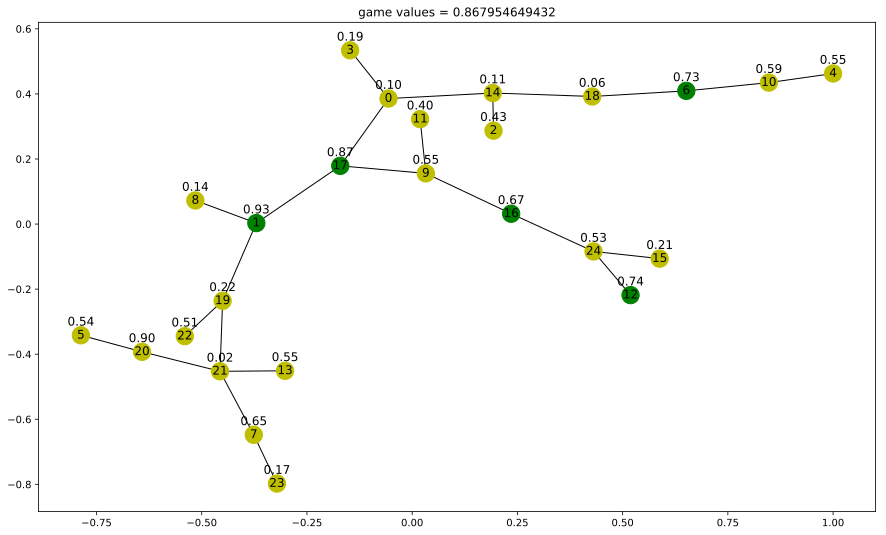

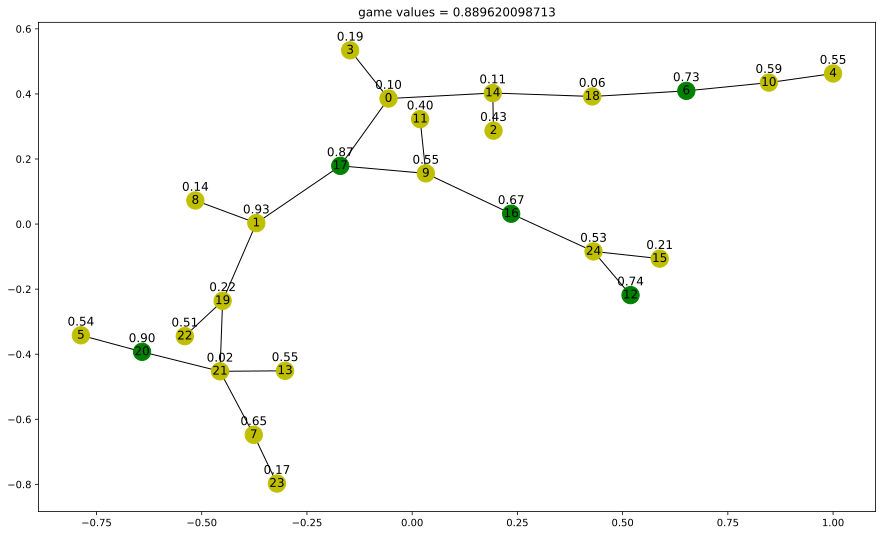

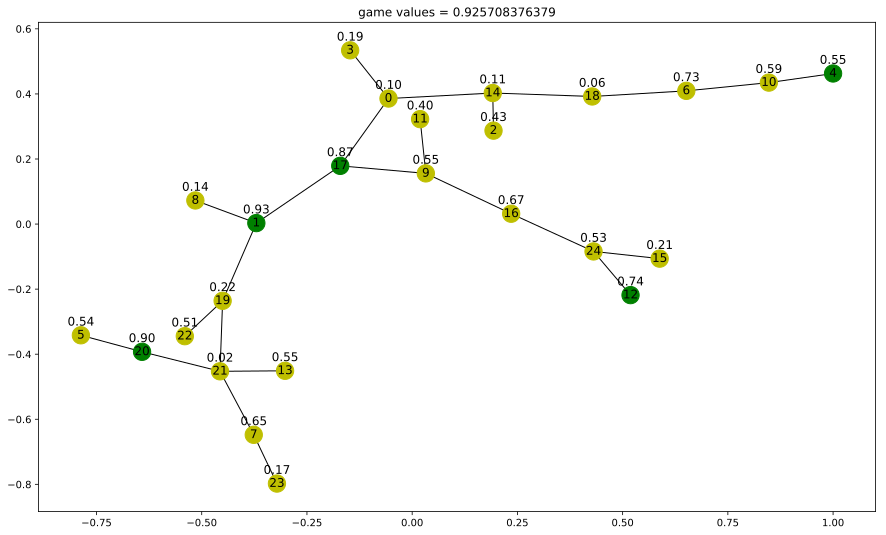

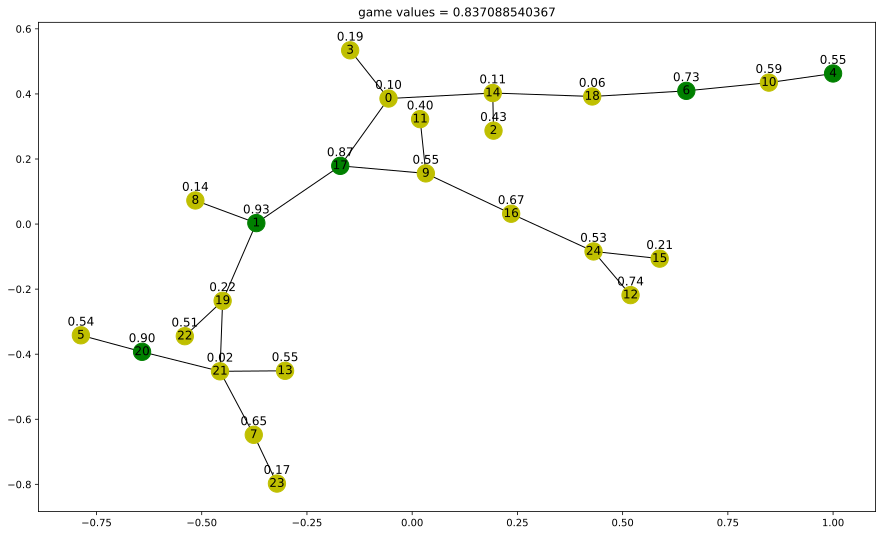

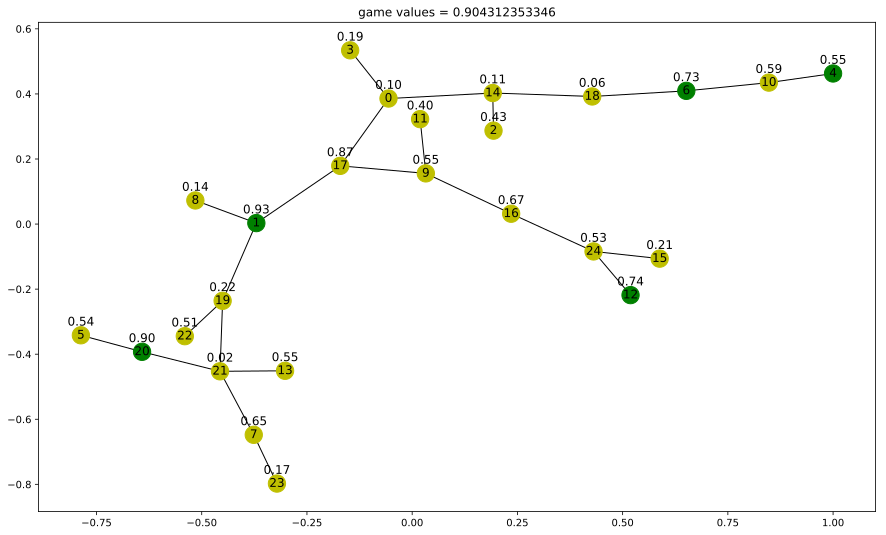

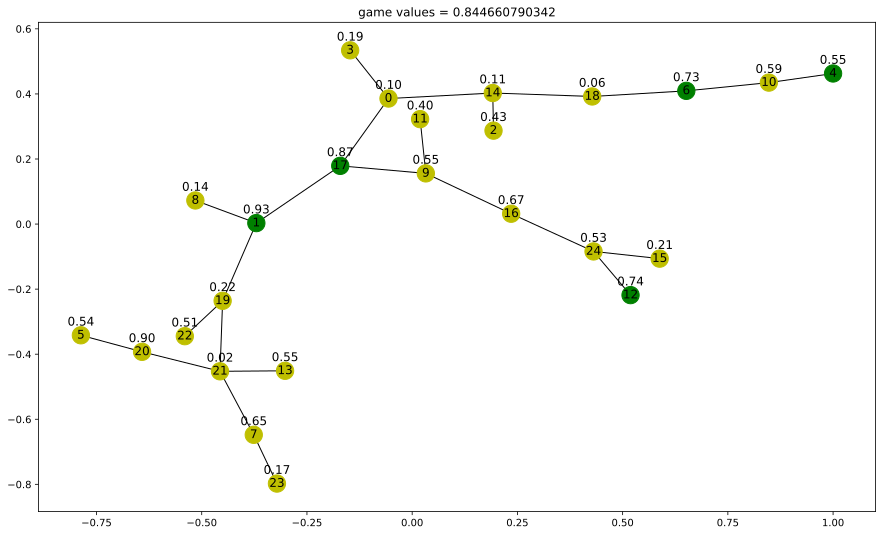

In [10]:
pylab.rcParams['figure.figsize'] = (15, 9)
game = 2
enum = 4
numres = 5
plotplaceimprove(result[(game, enum)], numres, values[game], G[game], layout[game], incremental=False)
pylab.rcParams['figure.figsize'] = (8.0, 6.0)

In [5]:
x = range(1)
y = [0, 1]
for i in x:
    graphs[i] = io.load_graph(25, 5, 8, i, rel_dead=1.5)
    for j in y:
        result[(i, j)] = io.load_results(25, 5, 8, i, apxtype=j, rel_dead=1.5)
if False:
    print('game values')
    for i in x:
        print('********************************')
        print('Values of game ' + str(i))
        for j in y:
            print('-----')
            print('enumeration ' + str(j))
            print(result[(i, j)][0])

NameError: name 'G' is not defined

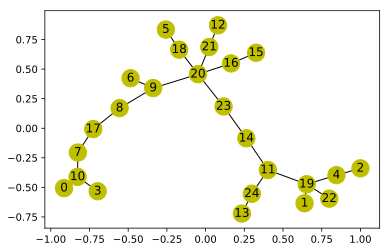

In [6]:
G[0], layout[0] = nu.compute_nx_graph(graphs[0], plot=True)

In [10]:
for v in graphs[0].getVertices():
    print(v.deadline)

14
17
16
16
14
13
13
16
13
15
15
13
17
13
16
16
13
13
12
12
16
14
14
14
12


In [12]:
int(12 * 1.5)

18